<a href="https://colab.research.google.com/github/Vrushali-M/Fall_2019_ML_project/blob/Data_vis/dataset_visualiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_path = r'gdrive/My Drive/ML_project/data'
df = pd.read_csv(data_path+'/df_after_csv.csv')

In [0]:
df.head()

,Unnamed: 0,isFraud,TransactionID,TransactionDT,card1,TransactionAmt,card2,card3,card5,addr1,addr2,dist1,dist2,ProductCD,card4,card6,P_emaildomain,R_emaildomain,DeviceType,DeviceInfo,bank_type,full_addr,uid1,uid2,fraud_card,C,D,V,M
0,0,0,2987000,86400,0.74304,0.00214,0.5108,0.38168,0.30657,0.48864,0.57596,0.00803,0.02753,0.0,0.0,0.0,3.0,5.0,1.0,1.0,0,0,0,0,0.0,0.00016,0.26667,0.41371,0.6
1,1,0,2987001,86401,0.10089,0.00090,0.6080,0.38168,0.01460,0.51136,0.57596,0.01983,0.02851,0.0,1.0,0.0,0.0,5.0,1.0,1.0,1,1,1,1,0.0,0.00013,0.22906,0.41270,0.4
2,2,0,2987002,86469,0.21057,0.00184,0.7800,0.38168,0.48175,0.52273,0.57596,0.03392,0.02856,0.0,2.0,1.0,1.0,5.0,1.0,1.0,2,2,2,2,0.0,0.00013,0.30908,0.41296,0.4
3,3,0,2987003,86499,0.98482,0.00156,0.9340,0.38168,0.12409,0.85455,0.57596,0.02009,0.02805,0.0,1.0,1.0,2.0,5.0,1.0,-1.0,3,3,3,3,0.0,0.00112,0.33121,0.41619,0.4
4,4,0,2987004,86506,0.20102,0.00156,0.8280,0.38168,0.01460,0.72727,0.57596,0.01874,0.02694,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1,4,4,4,0.0,0.00018,0.32414,0.53052,0.4


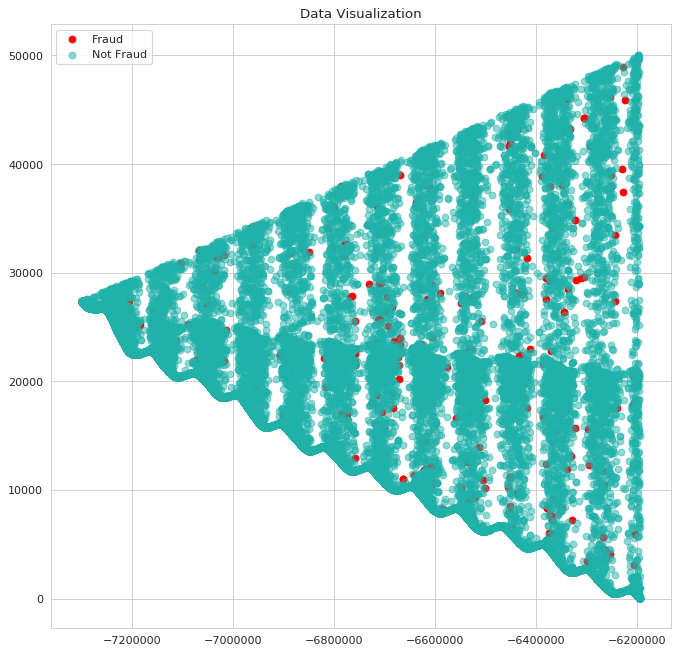

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

y = df['isFraud'][:50000]


pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(df))[:50000]

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Fraud', c='red')

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Not Fraud', c='lightseagreen', alpha = 0.5)

plt.title("Data Visualization")
plt.legend()
plt.show()

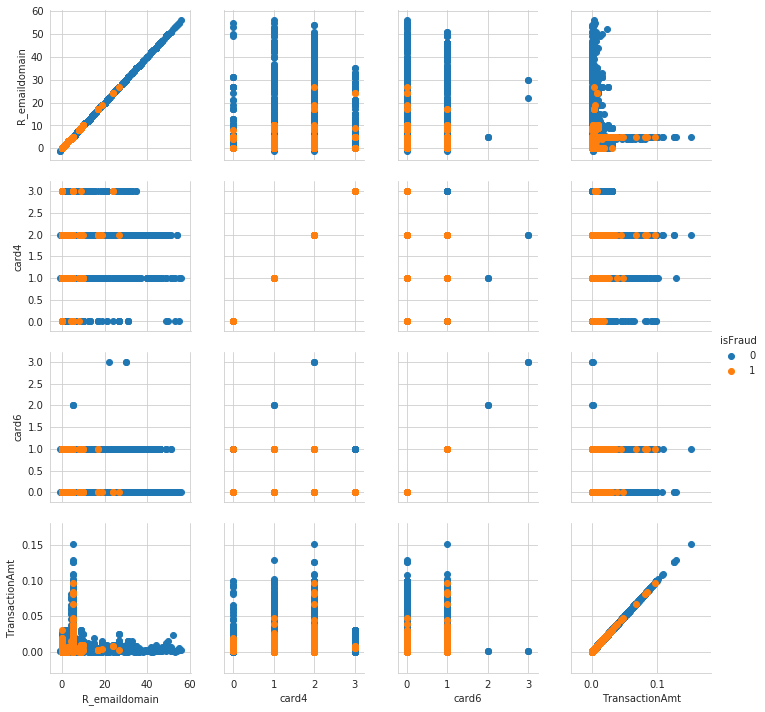

In [0]:
sns.set_style('whitegrid')
g = sns.PairGrid(df[:50000], vars=["R_emaildomain", 'card4', 'card6', 'TransactionAmt'], hue="isFraud")
g.map(plt.scatter);
g.add_legend();


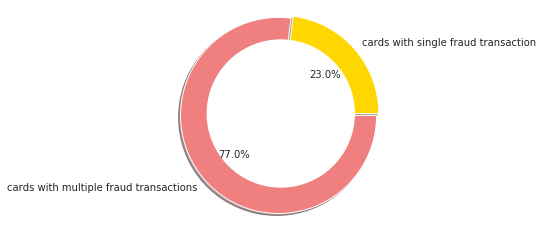

In [0]:
def multi_fraud_transactions_plot(sizes):
    import matplotlib.pyplot as plt
    %matplotlib inline

    # The slices will be ordered and plotted counter-clockwise.
    labels = 'cards with single fraud transaction', 'cards with multiple fraud transactions'
    colors = ['gold', 'lightcoral']
    explode = (0, 0.03)  # explode a slice if required

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()  
    
#To USE
tmp = df[df['isFraud']==1]
tmp2 = tmp['uid2'].unique()
a = len(df[df['isFraud']==1])
b = len(tmp[tmp['fraud_card']==1]['uid2'].unique())
multi_fraud_transactions_plot([a-b, b])